## Observations and Insights 

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
combined_df = pd.merge(mouse_metadata, study_results, on="Mouse ID", how="outer")

# Display the data table for preview
combined_df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [ ]:
combined_df.shape

In [2]:
# Checking the number of mice.
number_of_mice = combined_df["Mouse ID"].nunique()
number_of_mice

249

In [3]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
#MouseID_Timepoint =combined_df.loc[ : , ["Mouse ID","Timepoint"]]
#CodeSource: https://onlinecoursetutorials.com/pandas/how-to-find-duplicate-values-using-pandas/
#print("Printing duplicate values")
#print(MouseID_Timepoint[MouseID_Timepoint.duplicated(keep=False)])  

print(combined_df.loc[ : , ["Mouse ID","Timepoint"]][combined_df.loc[ : , ["Mouse ID","Timepoint"]].duplicated(keep=False)])  

    Mouse ID  Timepoint
908     g989          0
909     g989          0
910     g989          5
911     g989          5
912     g989         10
913     g989         10
914     g989         15
915     g989         15
916     g989         20
917     g989         20


In [4]:
# Optional: Get all the data for the duplicate mouse ID.

# To returns ROWS 909, 911, 913, 915 AND 917, and  all COLUMNS 

combined_df.iloc[[909, 911, 913,915,917],:]

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
909,g989,Propriva,Female,21,26,0,45.000000,0
911,g989,Propriva,Female,21,26,5,47.570392,0
913,g989,Propriva,Female,21,26,10,49.880528,0
915,g989,Propriva,Female,21,26,15,53.442020,0
917,g989,Propriva,Female,21,26,20,54.657650,1


In [5]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
clean_combined_df = combined_df.drop([909,911,913,915,917])
clean_combined_df.shape

(1888, 8)

In [6]:
# Checking the number of mice in the clean DataFrame.
number_of_mice = clean_combined_df["Mouse ID"].nunique()
number_of_mice

249

## Summary Statistics

In [8]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

#Create inital summary table with Drug Regimes and counts
summarystats = pd.DataFrame(clean_combined_df.groupby("Drug Regimen").count())

#Use groupby to create summary stats by drug regime, add results into columns in summarystats

summarystats["Mean"] = pd.DataFrame(clean_combined_df.groupby("Drug Regimen")["Tumor Volume (mm3)"].mean())
summarystats["Median"] = pd.DataFrame(clean_combined_df.groupby("Drug Regimen")["Tumor Volume (mm3)"].median())
summarystats["Standard Deviation"] = pd.DataFrame(clean_combined_df.groupby("Drug Regimen")["Tumor Volume (mm3)"].std())
summarystats["Variance"] = pd.DataFrame(clean_combined_df.groupby("Drug Regimen")["Tumor Volume (mm3)"].var())
summarystats["SEM"] = pd.DataFrame(clean_combined_df.groupby("Drug Regimen")["Tumor Volume (mm3)"].sem())

#Clean up columns, just keeping a count column for some of the graphs below
summarystats = summarystats[["Mouse ID", "Mean", "Median", "Standard Deviation", "Variance", "SEM"]].round(2)

summarystats

,Mouse ID,Mean,Median,Standard Deviation,Variance,SEM
Drug Regimen,,,,,,
Capomulin,230,40.68,41.56,4.99,24.95,0.33
Ceftamin,178,52.59,51.78,6.27,39.29,0.47
Infubinol,178,52.88,51.82,6.57,43.13,0.49
Ketapril,188,55.24,53.70,8.28,68.55,0.60
Naftisol,186,54.33,52.51,8.13,66.17,0.60
Placebo,181,54.03,52.29,7.82,61.17,0.58
Propriva,156,52.39,50.91,6.57,43.14,0.53
Ramicane,228,40.22,40.67,4.85,23.49,0.32
Stelasyn,181,54.23,52.43,7.71,59.45,0.57


In [9]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# This method produces everything in a single groupby function

summarystats_describe = clean_combined_df.groupby('Drug Regimen').agg(['count','mean', 'median', 'var', 'std','sem']) ['Tumor Volume (mm3)']

summarystats_describe.round(2)


,count,mean,median,var,std,sem
Drug Regimen,,,,,,
Capomulin,230,40.68,41.56,24.95,4.99,0.33
Ceftamin,178,52.59,51.78,39.29,6.27,0.47
Infubinol,178,52.88,51.82,43.13,6.57,0.49
Ketapril,188,55.24,53.70,68.55,8.28,0.60
Naftisol,186,54.33,52.51,66.17,8.13,0.60
Placebo,181,54.03,52.29,61.17,7.82,0.58
Propriva,156,52.39,50.91,43.14,6.57,0.53
Ramicane,228,40.22,40.67,23.49,4.85,0.32
Stelasyn,181,54.23,52.43,59.45,7.71,0.57


## Bar and Pie Charts

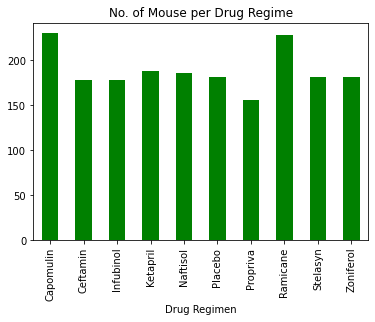

<Figure size 432x288 with 0 Axes>

In [10]:
# Generate a bar plot showing the total number of mice for each treatment throughout the course of the study using pandas. 

# Filter the DataFrame down only to those columns to chart
Number_of_Mice = summarystats[["Mouse ID"]]

# Use DataFrame.plot() in order to create a bar chart of the data
Number_of_Mice.plot(kind="bar", figsize=(6,4), color = "g", legend=False)

# Set a title for the chart
plt.title("No. of Mouse per Drug Regime")

plt.show()
plt.tight_layout()


NameError: name 'datapoints' is not defined

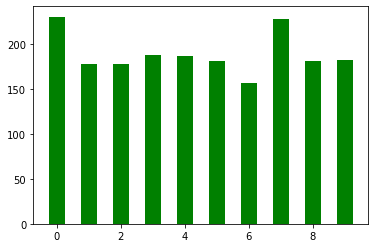

In [11]:
# Generate a bar plot showing the total number of mice for each treatment throughout the course of the study using pyplot.

# Set x axis and tick locations
x_axis = np.arange(len(Number_of_Mice))
tick_locations = [value for value in x_axis]

# Create a list indicating where to write x labels and set figure size to adjust for space
plt.figure(figsize=(6,4))
plt.bar(x_axis, Number_of_Mice["Mouse ID"], color = "g", width = .5)
plt.xticks(tick_locations, datapoints.index.values, rotation="vertical")

# Set x and y limits
plt.xlim(-0.75, len(x_axis)-.25)
plt.ylim(0, max(datapoints["Mouse ID"])+10)

# Set a Title and labels
plt.title("No. of Mouse per Drug Regime")
plt.xlabel("Drug Regime")


# Save our graph and show the grap
plt.show()

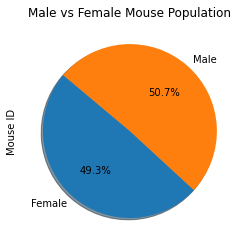

In [64]:
# Generate a pie plot showing the distribution of female versus male mice using pandas
gender = clean_combined_df.groupby('Sex').count()['Mouse ID']
gender_df = pd.DataFrame(gender)

pie_plot = gender.plot.pie(y='Sex',autopct="%1.1f%%", shadow=True, startangle=140)
plt.title('Male vs Female Mouse Population')

plt.savefig('piechart1')

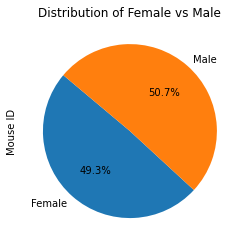

<Figure size 432x288 with 0 Axes>

In [65]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot

gender = clean_combined_df.groupby('Sex').count()['Mouse ID']
gender_df = pd.DataFrame(gender)
gender_df 

plt.pie(gender,labels=gender.index,autopct="%1.1f%%",startangle=140);
plt.title('Distribution of Female vs Male')
plt.ylabel('Mouse ID')
plt.show()

plt.savefig('piechart2')

## Quartiles, Outliers and Boxplots

In [ ]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

In [29]:
# Treatment Regimen 1 - Capomulin
capomulin_df = clean_combined_df.loc[clean_combined_df["Drug Regimen"] == "Capomulin",:]

In [30]:
cap_last = capomulin_df.groupby('Mouse ID').max()['Timepoint']
cap_last_vol = pd.DataFrame(cap_last)
cap_last_merge = pd.merge(cap_last_vol, clean_combined_df, on=("Mouse ID","Timepoint"),how="left")
cap_last_merge.head(5)

,Mouse ID,Timepoint,Drug Regimen,Sex,Age_months,Weight (g),Tumor Volume (mm3),Metastatic Sites
0,b128,45,Capomulin,Female,9,22,38.982878,2
1,b742,45,Capomulin,Male,7,21,38.939633,0
2,f966,20,Capomulin,Male,16,17,30.485985,0
3,g288,45,Capomulin,Male,3,19,37.074024,1
4,g316,45,Capomulin,Female,22,22,40.159220,2


In [32]:
tumors_cap = cap_last_merge["Tumor Volume (mm3)"]

quartiles = tumors_cap.quantile([.25,.5,.75])
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = upperq-lowerq

#print(f"The lower quartile of temperatures is: {lowerq}")
#print(f"The upper quartile of temperatures is: {upperq}")
#print(f"The interquartile range of temperatures is: {iqr}")
#print(f"The the median of temperatures is: {quartiles[0.5]} ")

lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)
print(f"Capomulin potential outliers could be values below {lower_bound} and above {upper_bound} could be outliers.")

Capomulin potential outliers could be values below 20.70456164999999 and above 51.83201549 could be outliers.


In [33]:
# Treatment Regimen 2 - Ramicane
ramicane_df = clean_combined_df.loc[clean_combined_df["Drug Regimen"] == "Ramicane",:]

In [36]:
ram_last = ramicane_df.groupby('Mouse ID').max()['Timepoint']
ram_last_vol = pd.DataFrame(ram_last)
ram_last_merge = pd.merge(ram_last_vol, clean_combined_df, on=("Mouse ID","Timepoint"),how="left")
ram_last_merge.head(5)

,Mouse ID,Timepoint,Drug Regimen,Sex,Age_months,Weight (g),Tumor Volume (mm3),Metastatic Sites
0,a411,45,Ramicane,Male,3,22,38.407618,1
1,a444,45,Ramicane,Female,10,25,43.047543,0
2,a520,45,Ramicane,Male,13,21,38.810366,1
3,a644,45,Ramicane,Female,7,17,32.978522,1
4,c458,30,Ramicane,Female,23,20,38.342008,2


In [44]:
tumors_ram = ram_last_merge["Tumor Volume (mm3)"]

quartiles = tumors_ram.quantile([.25,.5,.75])
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = upperq-lowerq

#print(f"The lower quartile of temperatures is: {lowerq}")
#print(f"The upper quartile of temperatures is: {upperq}")
#print(f"The interquartile range of temperatures is: {iqr}")
#print(f"The the median of temperatures is: {quartiles[0.5]} ")

lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)
print(f"Ramicane potential outliers could be values below {lower_bound} and above {upper_bound} could be outliers.")

Ramicane potential outliers could be values below 17.912664470000003 and above 54.30681135 could be outliers.


In [38]:
# Treatment Regimen 3 - Infubinol
infubinol_df = clean_combined_df.loc[clean_combined_df["Drug Regimen"] == "Infubinol",:]

In [39]:
inf_last = infubinol_df.groupby('Mouse ID').max()['Timepoint']
inf_last_vol = pd.DataFrame(inf_last)
inf_last_merge = pd.merge(inf_last_vol, clean_combined_df, on=("Mouse ID","Timepoint"),how="left")
inf_last_merge.head(5)

,Mouse ID,Timepoint,Drug Regimen,Sex,Age_months,Weight (g),Tumor Volume (mm3),Metastatic Sites
0,a203,45,Infubinol,Female,20,23,67.973419,2
1,a251,45,Infubinol,Female,21,25,65.525743,1
2,a577,30,Infubinol,Female,6,25,57.031862,2
3,a685,45,Infubinol,Male,8,30,66.083066,3
4,c139,45,Infubinol,Male,11,28,72.226731,2


In [43]:
tumors_inf = inf_last_merge["Tumor Volume (mm3)"]

quartiles = tumors_inf.quantile([.25,.5,.75])
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = upperq-lowerq

#print(f"The lower quartile of temperatures is: {lowerq}")
#print(f"The upper quartile of temperatures is: {upperq}")
#print(f"The interquartile range of temperatures is: {iqr}")
#print(f"The the median of temperatures is: {quartiles[0.5]} ")

lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)
print(f"Infubinol potential outliers could be values below {lower_bound} and above {upper_bound} could be outliers.")

Infubinol potential outliers could be values below 36.83290494999999 and above 82.74144559000001 could be outliers.


In [45]:
# Treatment Regimen 4 - Ceftamin
ceftamin_df = clean_combined_df.loc[clean_combined_df["Drug Regimen"] == "Ceftamin",:]

In [46]:
cef_last = ceftamin_df.groupby('Mouse ID').max()['Timepoint']
cef_last_vol = pd.DataFrame(cef_last)
cef_last_merge = pd.merge(cef_last_vol, clean_combined_df, on=("Mouse ID","Timepoint"),how="left")
cef_last_merge.head(5)

,Mouse ID,Timepoint,Drug Regimen,Sex,Age_months,Weight (g),Tumor Volume (mm3),Metastatic Sites
0,a275,45,Ceftamin,Female,20,28,62.999356,3
1,b447,0,Ceftamin,Male,2,30,45.000000,0
2,b487,25,Ceftamin,Female,6,28,56.057749,1
3,b759,30,Ceftamin,Female,12,25,55.742829,1
4,f436,15,Ceftamin,Female,3,25,48.722078,2


In [47]:
tumors_cef = cef_last_merge["Tumor Volume (mm3)"]

quartiles = tumors_cef.quantile([.25,.5,.75])
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = upperq-lowerq

#print(f"The lower quartile of temperatures is: {lowerq}")
#print(f"The upper quartile of temperatures is: {upperq}")
#print(f"The interquartile range of temperatures is: {iqr}")
#print(f"The the median of temperatures is: {quartiles[0.5]} ")

lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)
print(f"Ceftamin potential outliers could be values below {lower_bound} and above {upper_bound} could be outliers.")

Ceftamin potential outliers could be values below 25.355449580000002 and above 87.66645829999999 could be outliers.


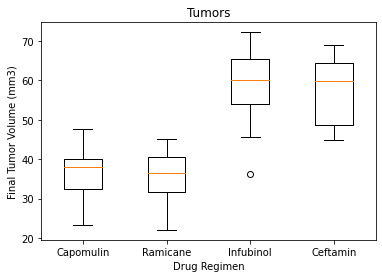

In [48]:
data_to_plot = [tumors_cap, tumors_ram, tumors_inf, tumors_cef]

fig1, ax1 = plt.subplots()
ax1.set_title('Tumors')
ax1.set_ylabel('Final Tumor Volume (mm3)')
ax1.set_xlabel('Drug Regimen')

ax1.boxplot(data_to_plot, labels=["Capomulin","Ramicane","Infubinol","Ceftamin",])

plt.savefig('boxplot')
plt.show()

## Line and Scatter Plots

In [51]:
# Generate a line plot of time point versus tumor volume for a mouse treated with Capomulin
line_df = capomulin_df.loc[capomulin_df["Mouse ID"] == "b128",:]
line_df.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
300,b128,Capomulin,Female,9,22,0,45.000000,0
301,b128,Capomulin,Female,9,22,5,45.651331,0
302,b128,Capomulin,Female,9,22,10,43.270852,0
303,b128,Capomulin,Female,9,22,15,43.784893,0
304,b128,Capomulin,Female,9,22,20,42.731552,0


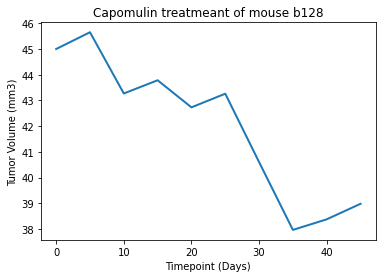

In [52]:
x_axisTP = line_df["Timepoint"]
tumsiz = line_df["Tumor Volume (mm3)"]

plt.title('Capomulin treatmeant of mouse b128')
plt.plot(x_axisTP, tumsiz,linewidth=2, markersize=12)
plt.xlabel('Timepoint (Days)')
plt.ylabel('Tumor Volume (mm3)')

plt.savefig('linechart')
plt.show()

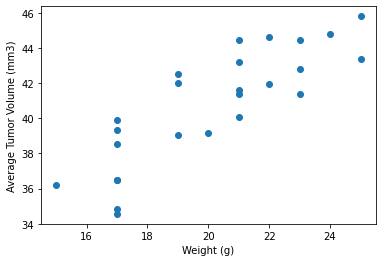

In [56]:
# Generate a scatter plot of mouse weight versus average tumor volume for the Capomulin regimen
cap_avg = capomulin_df.groupby(['Mouse ID']).mean()

plt.scatter(cap_avg['Weight (g)'],cap_avg['Tumor Volume (mm3)'])
plt.xlabel('Weight (g)')
plt.ylabel('Average Tumor Volume (mm3)')

plt.savefig('scatterplot')
plt.show()

## Correlation and Regression

In [57]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen
corr=round(st.pearsonr(cap_avg['Weight (g)'],cap_avg['Tumor Volume (mm3)'])[0],2)
print(f"The correlation between mouse weight and average tumor volume is {corr}")

The correlation between mouse weight and average tumor volume is 0.84


In [58]:
model=st.linregress(cap_avg['Weight (g)'],cap_avg['Tumor Volume (mm3)'])
model

LinregressResult(slope=0.9544396890241045, intercept=21.552160532685015, rvalue=0.8419363424694718, pvalue=1.3225722434712642e-07, stderr=0.1275435903320134)

In [60]:
mslope = 0.9544396890241045
bintercept = 21.552160532685015

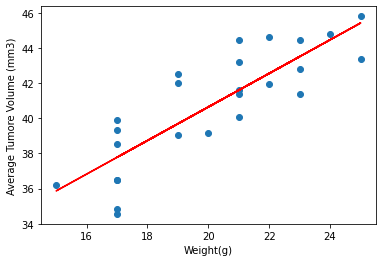

In [61]:
y_values = cap_avg['Weight (g)']*mslope+bintercept
plt.scatter(cap_avg['Weight (g)'],cap_avg['Tumor Volume (mm3)'])
plt.plot(cap_avg['Weight (g)'],y_values,color="red")
plt.xlabel('Weight(g)')
plt.ylabel('Average Tumore Volume (mm3)')

plt.savefig('linearregression')
plt.show()